# Employee Attrition Prediction Using Machine Learning

## Background
As a junior data scientist with a foundation in economics and management, I am on an exciting journey to deepen my expertise in data science, with a particular focus on advanced analytics and machine learning. This project represents a significant step in my learning process, applying theoretical knowledge to real-world business challenges.

## Project Overview
Employee attrition is a critical issue that can substantially impact a company's financial health and operational efficiency. For HR professionals and business leaders, understanding the factors driving employee attrition is crucial for developing effective retention strategies. This project aims to leverage the power of machine learning to predict and analyze employee attrition.

***NOTE : THIS PROJECT BUILT IS ON RAZUKI(sgjustino)'S PROJECT ON KAGGLE***

## Objectives
1. Develop predictive models for employee attrition using various supervised machine learning algorithms.
2. Compare the performance of different algorithms in the context of HR analytics.
3. Identify key factors contributing to employee attrition.
4. Gain hands-on experience in applying machine learning techniques to real-world business problems.
5. Live Deployment

## Methodology
We will employ a range of supervised machine learning algorithms, including:
- Logistic Regression
- Random Forest
- Gradient Boosting Models, etc

These models will be trained and tested on a comprehensive dataset containing various employee-related features, with attrition as the target variable.

## Expected Outcomes
Through this analysis, we aim to:
1. Create improved predictive models for employee attrition.
2. Uncover insights into the most significant factors influencing employee turnover.
3. Provide actionable recommendations for HR strategies to mitigate attrition risks.
4. Demonstrate the practical application of machine learning in solving HR-related challenges.

This project not only serves as a valuable learning experience in advanced analytics and machine learning but also showcases the potential of data-driven decision-making in human resource management.

This is a fictional dataset created by IBM data scientists to study attrition found in the link below: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

IBM. IBM HR Analytics Employee Attrition & Performance (Uploaded by Pavan Subhash) . Kaggle. Retrieved [18 Oct 2023] from [https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data].


The dataset was further analyzed and improved model by Razuki: [https://www.kaggle.com/code/sgjustino/ibm-hr-data-supervised-ml-algorithms]

***NOTE : THIS PROJECT BUILT IS ON RAZUKI(sgjustino)'S PROJECT ON KAGGLE***

In [1]:
from google.colab import drive

import numpy as np
import pandas as pd
from tabulate import tabulate

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier


drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = pd.read_csv('/content/drive/MyDrive/Kemedatalab/Employee_attrition/HR_Employee_Attrition.csv')
data = file_path

data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
pd.options.display.max_columns = 200

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [6]:
data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data.shape

(1470, 35)

In [8]:
data.dtypes.value_counts()

,count
int64,26
object,9


***A quick look into our dataset shows:***
- We have our data in .csv file
- We have 35 total columns/features and 1470 rows
- Out of the 35 columns/features,  26 are numerical while 26 are categorical including ['attrition'] which is our target


Cleaning of data

In [9]:
#checking for missing values to be sure
missing_value = data.isnull().sum()
print('Missing Values:',missing_value, sep='\n')

print('===============================================')

data_unique = data.nunique()
print('Unique data:', data_unique, sep='\n')




Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [10]:
not_needed_columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data.drop(columns=not_needed_columns, inplace=True)

In [11]:
attrition_counts = data['Attrition'].value_counts()
print(attrition_counts)


Attrition
No     1233
Yes     237
Name: count, dtype: int64


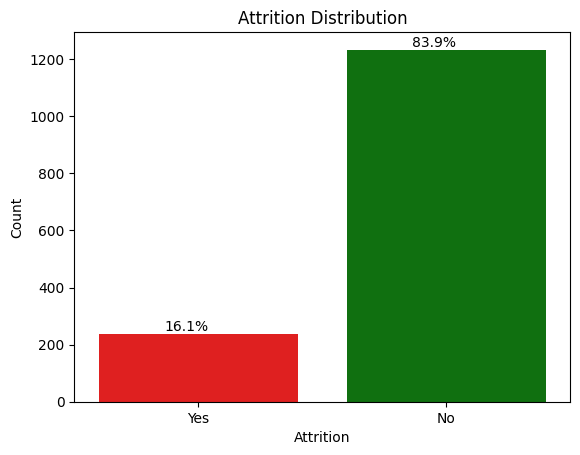

<Figure size 800x600 with 0 Axes>

In [12]:
# Calculate percentages
total = len(data)
ax = sns.countplot(x='Attrition', data=data, palette=['red', 'green'], hue='Attrition', legend=False)

# Annotate each bar with the percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Add titles and labels
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Adjust figure size
plt.figure(figsize=(8, 6))

plt.show()

Another quick look shows that we have imbalanced data.  we have 1233 'No' and 237 'Yes'. This imbalance should be addressed prior to model training to prevent overemphasis towards 'No' class when our study focus is on the employees who attrite - 'Yes'.

For better understanding, the percentage of attrition is 83.9 for 'NO' and 16.1 percent for 'YES'

***The analysis commenced by exploring factors that have been extensively researched and shown to be associated with attrition, including Age, Income, Job Role, Years at Company, Job Satisfaction, and Work-Life Balance. Their distribution across the two Attrition categories will be examined. Several relevant research papers are provided for reviewers who may be interested in further reading. ***

Azeem, S. M., & Akhtar, N. (2014). The influence of work life balance and job satisfaction on organizational commitment of healthcare employees. International journal of human resource studies, 4(2), 18.




Ng, T. W., & Feldman, D. C. (2010). The relationships of age with job attitudes: A meta‐analysis. Personnel psychology, 63(3), 677-718.




Steel, R. P., & Ovalle, N. K. (1984). A review and meta-analysis of research on the relationship between behavioral intentions and employee turnover. Journal of applied psychology, 69(4), 673.


Wright, B. E., & Christensen, R. K. (2010). Public service motivation: A test of the job attraction–selection–attrition model. International Public Management Journal, 13(2), 155-176.

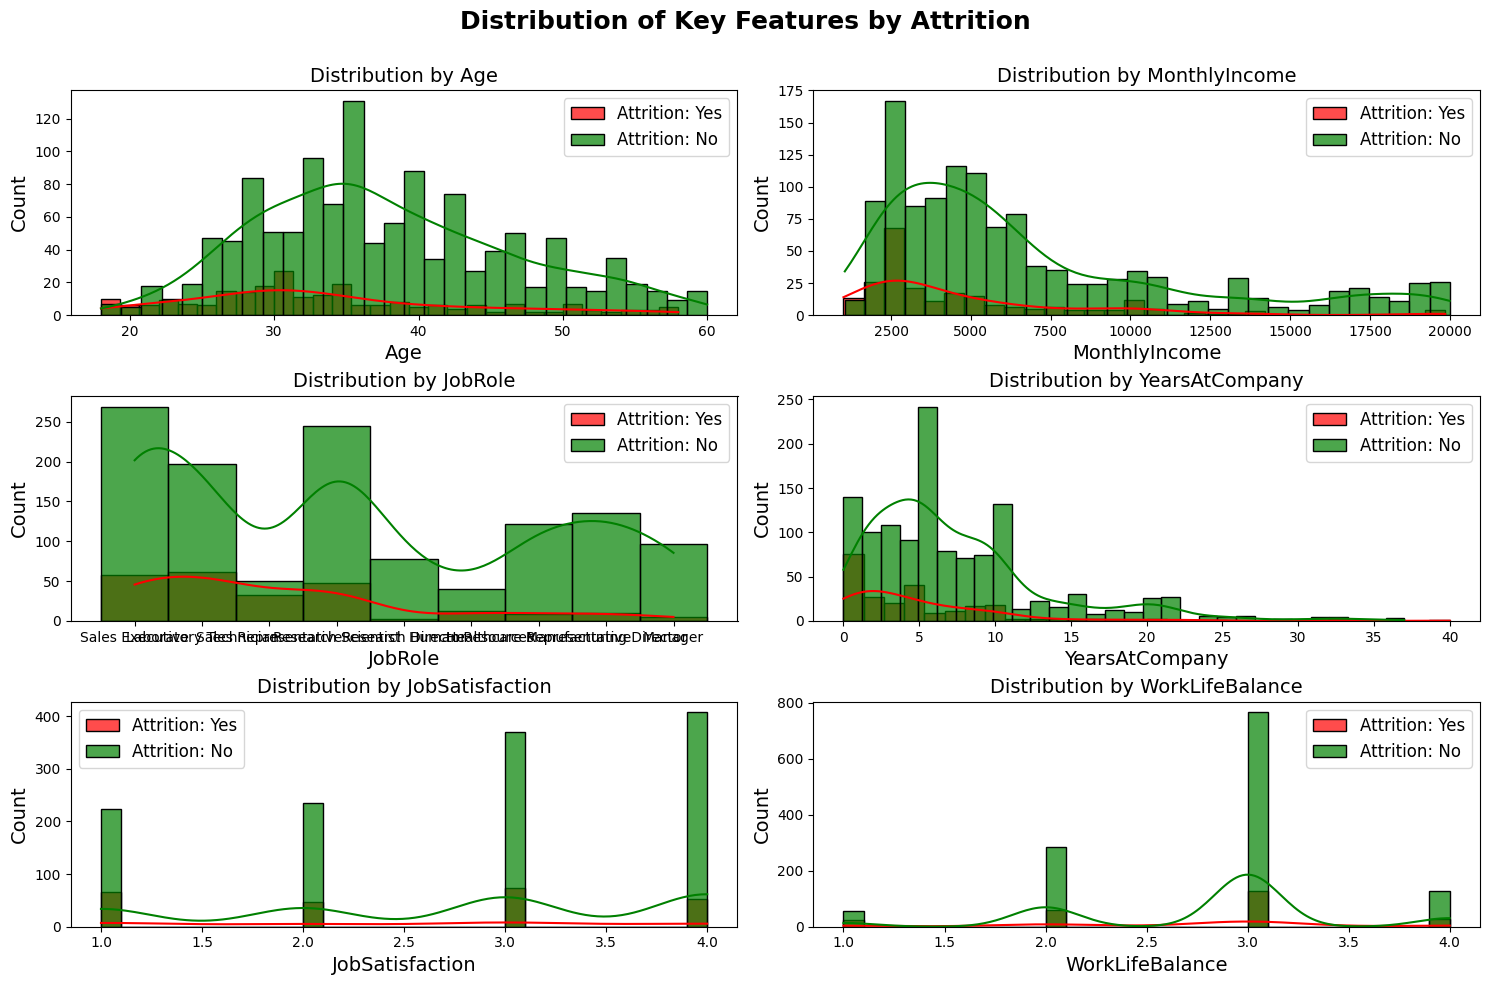

In [14]:


# Key features creation
key_features = ['Age', 'MonthlyIncome', 'JobRole', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']

attrition_yes = data[data['Attrition'] == 'Yes']
attrition_no = data[data['Attrition'] == 'No']

# Examining distribution
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for ax, feature in zip(axes.flatten(), key_features):
    sns.histplot(data=attrition_yes, x=feature, ax=ax, color='red', label='Attrition: Yes', bins=30, kde=True, alpha=0.7)
    sns.histplot(data=attrition_no, x=feature, ax=ax, color='green', label='Attrition: No', bins=30, kde=True, alpha=0.7)

    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(f'Distribution by {feature}', fontsize=14)
    ax.legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space for suptitle
fig.suptitle('Distribution of Key Features by Attrition', fontsize=18, fontweight='bold')  # No LaTeX, using bold for emphasis

plt.show()




Healthcare Representative      No         122
Healthcare Representative      Yes        9

Human Resources                No         40
Human Resources                Yes        12

Laboratory Technician          No         197
Laboratory Technician          Yes        62

Manager                        No         97
Manager                        Yes        5

Manufacturing Director         No         135
Manufacturing Director         Yes        10

Research Director              No         78
Research Director              Yes        2

Research Scientist             No         245
Research Scientist             Yes        47

Sales Executive                No         269
Sales Executive                Yes        57

Sales Representative           No         50
Sales Representative           Yes        33


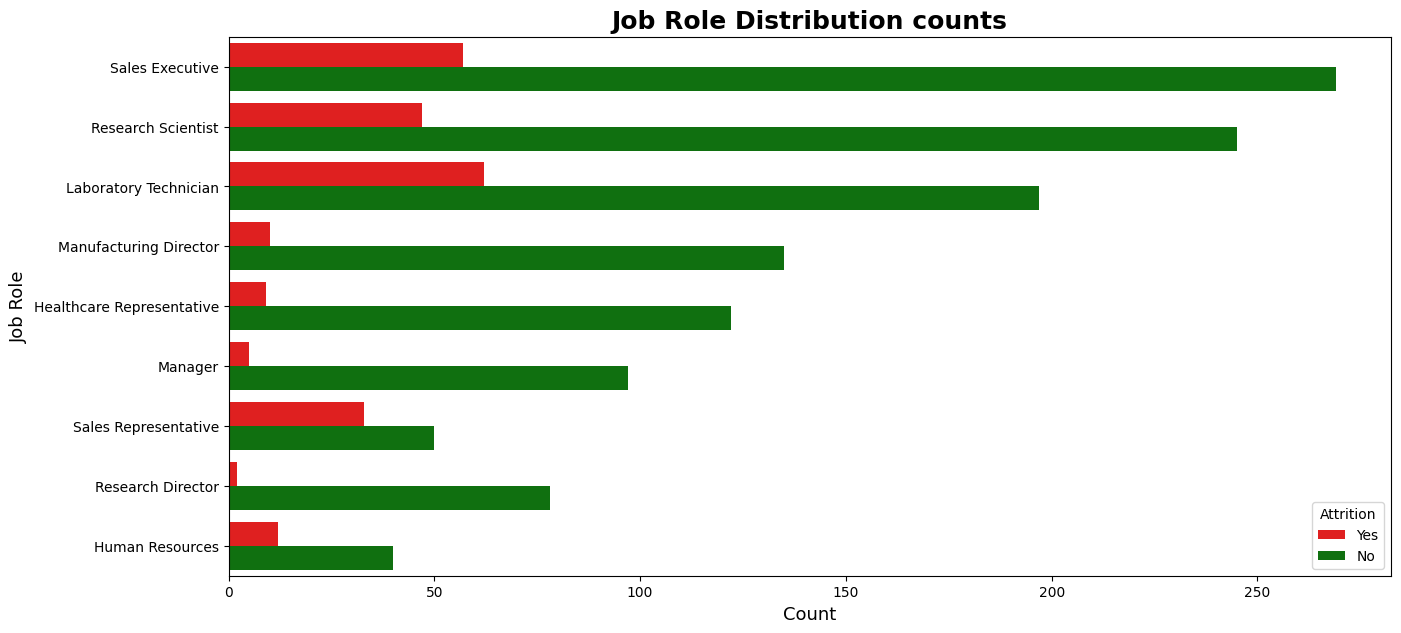

In [18]:
# Checking job describtion by role

# Grouping by 'JobRole' and 'Attrition' to get the counts
job_role_counts = data.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')

# Iterate and print with a line space between each job role
current_role = None
for _, row in job_role_counts.iterrows():
    job_role = row['JobRole']
    if job_role != current_role:
        if current_role is not None:
            print()  #space
        current_role = job_role
    print(f"{row['JobRole']:30} {row['Attrition']:10} {row['Count']}")


plt.figure(figsize=(15,7))
sns.countplot(data=data, y='JobRole', hue='Attrition', palette=['red', 'green'])
plt.title('Job Role Distribution counts', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=13)
plt.ylabel('Job Role', fontsize=13)
plt.show()

The initial distribution suggests alignment with research-backed evidence, showing noticeable differences between employees who left and those who stayed, particularly in features like Age, Monthly Income, and Years at Company. However, class imbalance makes it difficult to visualize differences in Job Satisfaction and Work-Life Balance, despite these factors being linked to negative engagement, absenteeism, and attrition in organizational studies.

Certain roles, such as Sales Executive, Research Scientist, Laboratory Technician, and Sales Representative, experience higher attrition rates, while management roles like Director and Manager see lower attrition. Although Job Level might offer better visual representation, Job Role is expected to provide stronger qualitative insights.

Next, categorical variables will be encoded, and a correlation matrix will be constructed to examine relationships and detect potential multicollinearity issues.

In [24]:
# Features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Encoding categorical variables
categorical_cols = X.select_dtypes(include=[object]).columns.tolist()

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X = X.astype(int)

#Encode Attrition
y = LabelEncoder().fit_transform(y)

In [25]:

correlation_matrix = X.corr()
correlation_df = pd.DataFrame(correlation_matrix)

# Display the DataFrame as a table
print(tabulate(correlation_df, headers='keys', tablefmt='pretty', floatfmt=".2f"))

+-----------------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+-------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-----------------------+------------------------+------------------------+--------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+------------------------+----------------------------------+------------------------------+-----------------------------------+-------------------------+------------------------------+--------------------------+------------------------+------------------------+---------------------------------+-------------------------+-------------------------+-------------------------------+------------------------+-----

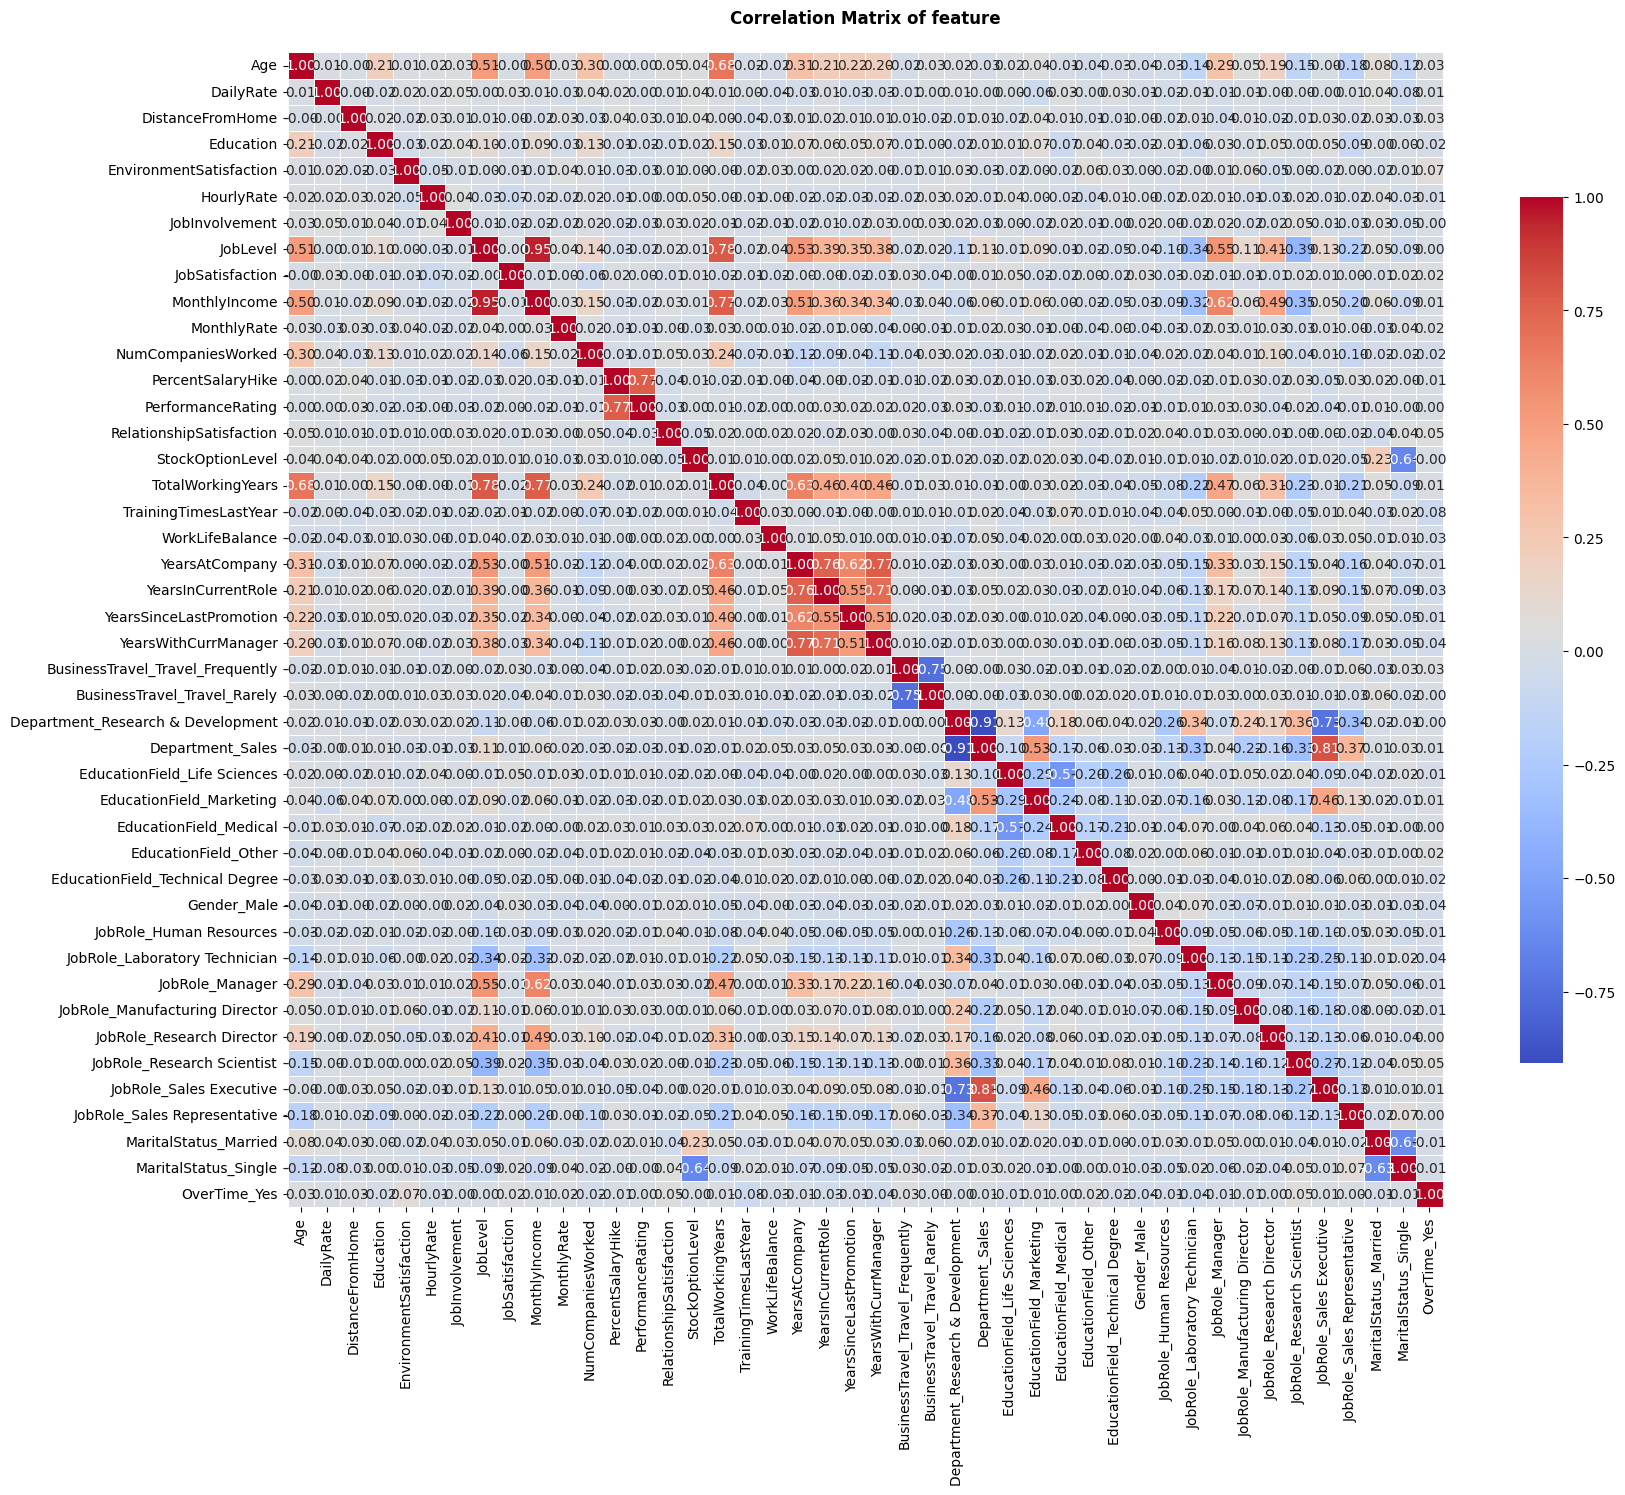

In [26]:


correlation_matrix = X.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, cbar_kws={'shrink': .75}, linewidths=0.5)
plt.title('Correlation Matrix of feature\n', fontweight='bold')
plt.show()


The predictors 'MonthlyIncome' and 'JobLevel' show a high correlation (0.95), suggesting overlapping information. Similarly, 'TotalWorkingYears' is strongly correlated with both 'JobLevel' (0.78) and 'MonthlyIncome' (0.77), which is expected since more experienced employees typically hold higher job levels and earn more. Additionally, 'YearsWithCurrManager', 'YearsAtCompany', and 'YearsInCurrentRole' are positively correlated, reflecting that employees tend to stay with the same managers and in the same roles over time.

In this analysis, predictors like 'MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', and 'YearsWithCurrManager' will be removed based on a 0.7 correlation cutoff, retaining 'JobLevel' and 'YearsAtCompany' to reduce multicollinearity.

'MonthlyIncome' is highly correlated with job level and is sensitive, making it redundant and difficult for policy-related work. 'TotalWorkingYears' is captured by other variables like 'YearsAtCompany'. 'YearsInCurrentRole' and 'YearsWithCurrManager' offer limited additional insights beyond 'YearsAtCompany', especially considering organizational structures and functional specializations.

In [27]:
X = X.drop(columns=['MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'])

# **Building model**

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyRate                        1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

**Logistic Regression**

We will first try to build a logistic regression model, which is specifically designed for binary classification problems and the most straightforward model in our case. Prior to model building, we will split the data into training and test dataset and balance the data using SMOTE (Synthetic Minority Over-sampling Technique) due to the highly imbalanced class distribution in Attrition.

In balancing, there are a couple of techniques commonly employed - weighting, down-sampling, up-sampling and SMOTE. Here, we will utilise SMOTE to combine both down-sampling of the majority class (Attrition - 'No') and up-sampling of the minority class (Attrition - 'Yes').

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Balance data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



Accuracy: 0.8843537414965986
Confusion Matrix:
 [[242  13]
 [ 21  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294



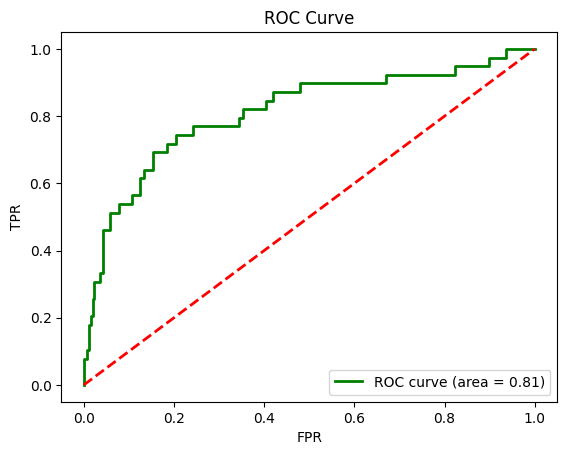

AUC-ROC Score (Logistic Regression): 0.8115635997988939


In [36]:
#Logistic Regression model

logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train_resampled, y_train_resampled)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

ypp = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, th = roc_curve(y_test, ypp)
auc = roc_auc_score(y_test, ypp)

lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


print('AUC-ROC Score (Logistic Regression):', auc)


#

Using the balanced sample generated by SMOTE, the logistic regression model achieved an F1 score of 0.51 and an AUC of 0.81. Given the small number of employees who left the company, this indicates that the linear model was unexpectedly effective in predicting attrition.

When working with imbalanced datasets, it is worth noting that the F1 score can be a more informative metric than AUC, as it balances precision and recall while being less influenced by class imbalance. It is also crucial to assess the results in relation to the study's focus. In this case, the accuracy score is less informative due to the lower emphasis on the minority class (Attrition - 'Yes'), as the majority class yielded better results.

To enhance the model's performance, hyperparameter tuning will be conducted for the logistic regression model using GridSearchCV with 5-fold cross-validation on the SMOTE-balanced dataset.


Best Parameters (Logistic Regression): {'C': 100, 'penalty': 'l2'}
Accuracy (Tuned Logistic Regression): 0.891156462585034
Confusion Matrix (Tuned Logistic Regression):
 [[241  14]
 [ 18  21]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       255
           1       0.60      0.54      0.57        39

    accuracy                           0.89       294
   macro avg       0.77      0.74      0.75       294
weighted avg       0.89      0.89      0.89       294



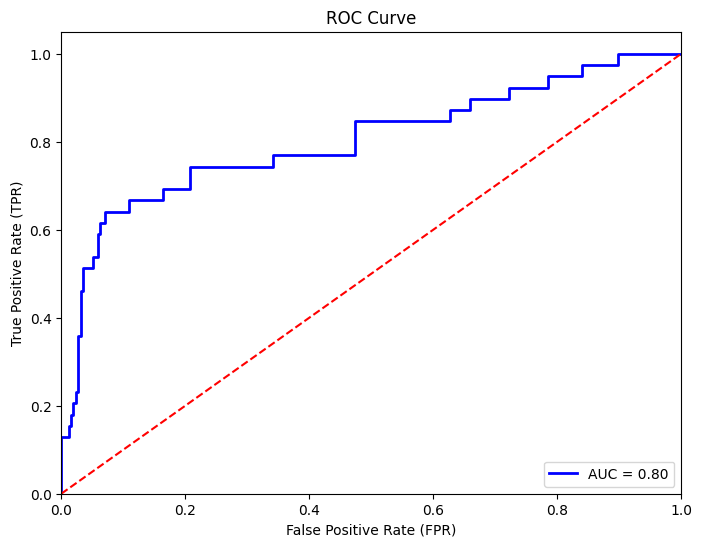

AUC-ROC Score (GridSeachCV): 0.8028154851684264


In [35]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

# GrridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_
best_estimator_lr.fit(X_train_resampled, y_train_resampled)

y_pred_tuned = best_estimator_lr.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)


print('\nBest Parameters (Logistic Regression):', best_params_lr)
print("Accuracy (Tuned Logistic Regression):", accuracy_tuned)
print("Confusion Matrix (Tuned Logistic Regression):\n", conf_matrix_tuned)
print("Classification Report (Logistic Regression):\n", classification_rep_tuned)


#AUC-ROC
y_prob_lr = best_estimator_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)


plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print('AUC-ROC Score (GridSeachCV):', auc_lr)



With hyperparameter tuning, there is improvement in the F1 score from 0.51 to 0.57 for Attrition['Yes']. There's decline hoever in the AUC from 0.811 to 0.802. Nonetheless, given the relatively small sample size and the absence of longitudinal employee data, these scores are reasonable for aiding the company in predicting attrition and implementing tailored interventions.

The analysis will next explore the data using a different model: Random Forest. Considering the numerous correlations among the features, the low F1 score in the logistic regression may be due to more non-linear and complex relationships between the features and attrition. Additionally, there may be more noisy data, as the hyperparameter tuning did not yield significant benefits for the linear regression. This prompts the use of the Random Forest model to better address the potential presence of complex relationships and noisy data.

The process will proceed directly to hyperparameter tuning via GridSearchCV (with 5-fold cross-validation) on the SMOTE-balanced dataset for building the Random Forest model.


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy (Tuned Random Forest): 0.8809523809523809
Confusion Matrix (Tuned Random Forest):
 [[249   6]
 [ 29  10]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       255
           1       0.62      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.76      0.62      0.65       294
weighted avg       0.86      0.88      0.86       294



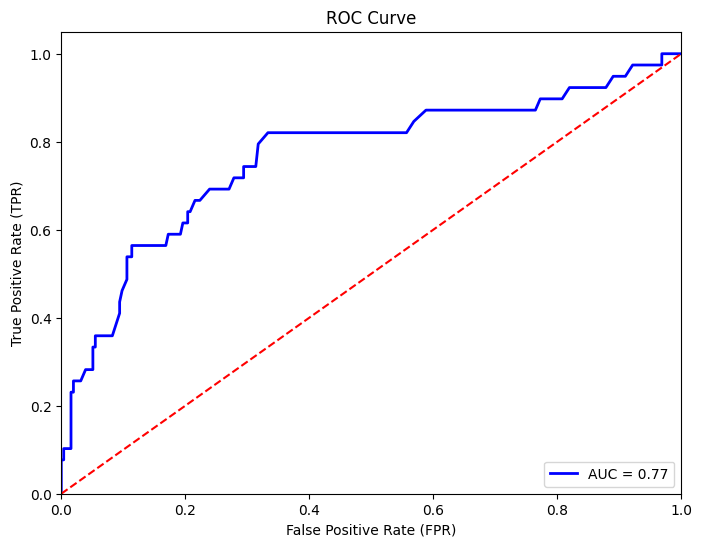

AUC-ROC Score (Random forest): 0.7662141779788839


In [34]:
# Random Forest
# Hyperparameter tunning

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#GridSerachCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_rf = best_estimator_rf.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
conf_matrix_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
classification_rep_tuned_rf = classification_report(y_test, y_pred_tuned_rf)


print('\nBest Parameters (Random Forest):', best_params_rf)
print("Accuracy (Tuned Random Forest):", accuracy_tuned_rf)
print("Confusion Matrix (Tuned Random Forest):\n", conf_matrix_tuned_rf)
print("Classification Report (Random Forest):\n", classification_rep_tuned_rf)


# AUC-ROC
y_prob_rf = best_estimator_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print('AUC-ROC Score (Random forest):', auc_rf)

Interestingly, the hyperparameter-tuned Random Forest model did not perform as well as the logistic regression, achieving an F1 score of 0.36 for Attrition['Yes'] and an AUC score of 0.77.

Although there was a hypothesis regarding more complex and non-linear relationships between the features and attrition, the relatively poor performance of the Random Forest model suggests that the underlying data may not display strong non-linear dependencies.

The next step will involve improving the prediction model using the Gradient Boosting method. Since Gradient Boosting builds trees sequentially, giving greater weight to misclassified samples, it is possible that this approach will yield higher predictive statistics for attrition.

The process will again proceed directly to hyperparameter tuning via GridSearchCV (with 5-fold cross-validation) on the SMOTE-balanced dataset for building the Gradient Boosting model.


Best Parameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Accuracy (Tuned Gradient Boosting): 0.8707482993197279
Confusion Matrix (Tuned Gradient Boosting):
 [[242  13]
 [ 25  14]]
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294



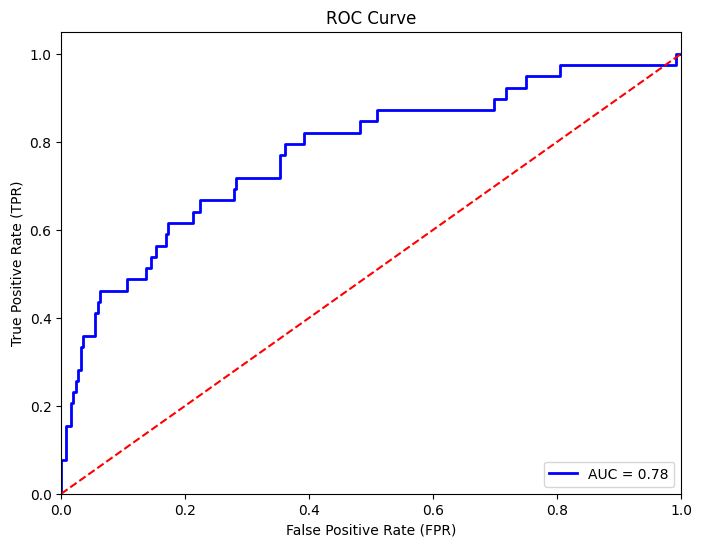

AUC-ROC Score (Gradient boosting): 0.7757667169431876


In [37]:
#Gradient boosting

#hyperparameter tuning


param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

#GridSearchCV

grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=5, n_jobs=-1)

grid_search_gb.fit(X_train_resampled, y_train_resampled)
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_
best_estimator_gb.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_gb = best_estimator_gb.predict(X_test)
accuracy_tuned_gb = accuracy_score(y_test, y_pred_tuned_gb)
conf_matrix_tuned_gb = confusion_matrix(y_test, y_pred_tuned_gb)
classification_rep_tuned_gb = classification_report(y_test, y_pred_tuned_gb)

print('\nBest Parameters (Gradient Boosting):', best_params_gb)
print("Accuracy (Tuned Gradient Boosting):", accuracy_tuned_gb)
print("Confusion Matrix (Tuned Gradient Boosting):\n", conf_matrix_tuned_gb)
print("Classification Report (Gradient Boosting):\n", classification_rep_tuned_gb)

# AUC-ROC
y_prob_gb = best_estimator_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'AUC = {auc_gb:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


print('AUC-ROC Score (Gradient boosting):', auc_gb)


The hyperparameter-tuned Gradient Boosting model did not perform as well as the logistic regression, achieving an F1 score of 0.42 for Attrition['Yes'] and an AUC score of 0.78. However, it outperformed the Random Forest model, likely due to the benefits of the sequential learning algorithm. Ensemble methods tend to excel in capturing non-linear relationships and interactions between features. The relatively poor performance of both the Random Forest and Gradient Boosting models in this context suggests that the underlying data may not exhibit strong non-linear dependencies.

Following the analysis of this binary classification problem through three different models with hyperparameter tuning, the results will be examined collectively in the next section.

# **Results & Analysis**

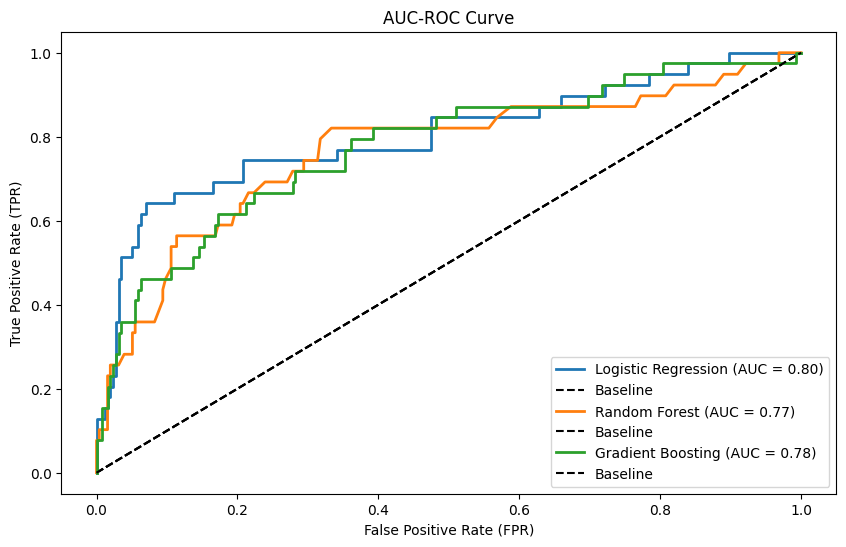


Model Evaluation Metrics:
                 Model       AUC  Precision    Recall  F1 Score
0  Logistic Regression  0.802815   0.600000  0.538462  0.567568
1        Random Forest  0.766214   0.625000  0.256410  0.363636
2    Gradient Boosting  0.775767   0.518519  0.358974  0.424242


In [39]:
#models

models = [best_estimator_lr, best_estimator_rf, best_estimator_gb]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model, name in zip(models, model_names):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)


    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Consolidated Results
metrics_df = pd.DataFrame({
    'Model': model_names,
    'AUC': auc_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print("\nModel Evaluation Metrics:")
print(metrics_df)


Looking at the data collectively, it is evident that the logistic regression model emerged as the top performer, achieving an F1 score of approximately 0.57 for Attrition['Yes'] and an AUC of 0.80. This outcome suggests the likely existence of linear relationships between attrition and the features, indicating that attrition is less dependent on non-linear or more complex relationships with other features. Additionally, when dealing with imbalanced datasets, it is important to note that the F1 score can be a more informative metric than AUC. The F1 score balances precision and recall and is less affected by class imbalance. While the accuracy score is more commonly used, it is less useful in this context due to the lower emphasis on the minority class (Attrition - 'Yes') because of the overemphasis on better results in the majority class. Overall, considering the relatively small sample of Attrition['Yes'] data and the lack of longitudinal employee data, the results from the logistic regression model are satisfactory and decent for aiding the company in predicting attrition and implementing tailored interventions.

On the other hand, the Random Forest and Gradient Boosting algorithms may not have performed well due to the relatively small to moderate-sized dataset. For these two ensemble methods, better predictive statistics are likely to be observed with a larger dataset, allowing them to fully exploit their capabilities. In this context, their complexity in building the model may have led to overfitting issues with the limited data size.

                             Feature  Coefficient
39                      OverTime_Yes     1.651212
19  BusinessTravel_Travel_Frequently     0.314889
10                NumCompaniesWorked     0.150945
18           YearsSinceLastPromotion     0.109753
28                       Gender_Male     0.092310
38              MaritalStatus_Single     0.050336
2                   DistanceFromHome     0.034969
5                         HourlyRate     0.000947
9                        MonthlyRate     0.000011
1                          DailyRate    -0.000155


<ipython-input-40-f85466baa99a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_10_features_lr, palette='viridis')


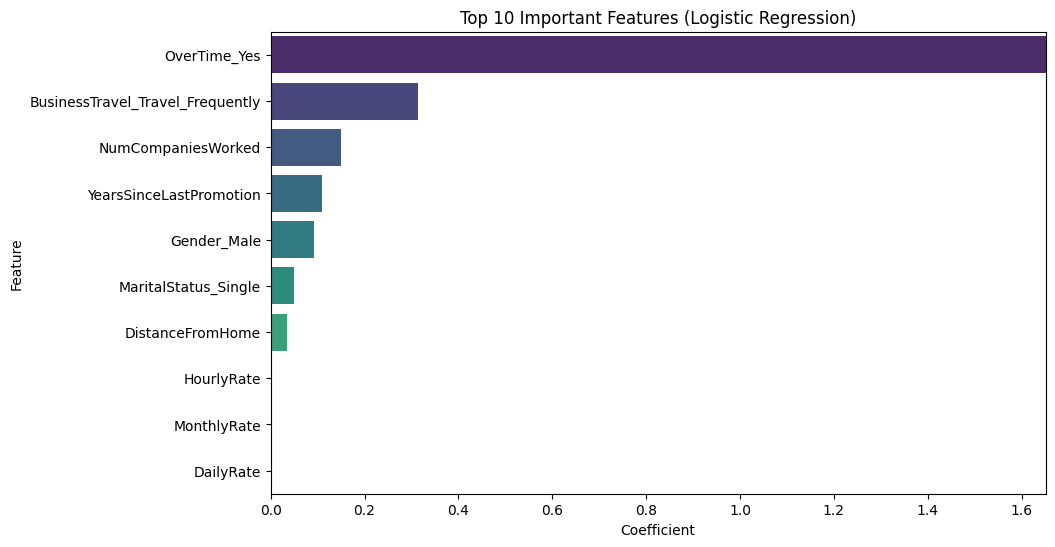

In [40]:
# Examining top 10 Features
coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)


print(top_10_features_lr)

coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features_lr, palette='viridis')
plt.xlim(0, top_10_features_lr['Coefficient'].max())  # Set the x-axis limit from 0 to the maximum coefficient
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.show()

# **Discussion and Conclussion**

As the logistic regression model emerged as the winner in our dataset context, we plotted the top 10 features from the model for the prediction on attrition. Below, we listed some explanation for each of the feature's possible causality in attributing attrition. We will also leave out HourlyRate and MonthlyRate due to their relatively small coefficient which reflects little to no influence vis-a-vis other features on Attrition in real-world settings.

OverTime_Yes (1.509276): Overtime work may lead to burnout and decreased job satisfaction, which can contribute to attrition.

PerformanceRating (0.417478): Surprisingly, better performance rating is associated with a higher likelihood of attrition. This, however, suggest that top employees may have attrited in light of better prospects for their careers elsewhere.

BusinessTravel_Travel_Frequently (0.194502): Frequent travel may disrupt work-life balance, possibly contributing to attrition.

NumCompaniesWorked (Coefficient: 0.140618): Employees who have worked in more companies may be more willing to seek outside opportunities in line with their working history.

YearsSinceLastPromotion (0.090782): Lack of career advancement may lead to employee dissatisfaction and contribute to attrition.

Gender_Male (0.071276): Male employees are slightly more likely to attrite than female employees. This has no working research explanation and would warrant further investigation in the company. However, taking a look across employee data might suggest that males may have a higher tendency to score higher on the other relevant features in affecting attrition.

MaritalStatus_Single (0.048594): The lack of family commitment or other financial ties might have influence single employees to look for other career opportunies elsewhere.

DistanceFromHome (Coefficient: 0.034816): Commuting stress or a desire for proximity to home may play a role in influencing attrition.

In this analysis, the results suggest that addressing work-life balance issues related to overtime and frequent business travel may help reduce attrition rates. Additionally, HR departments should pay attention to employees who have not received promotions for an extended period, as this group exhibits a higher likelihood of attrition. Higher performing employees are also likely to be talent-scouted by competition. A focus on recognition of work and tangible rewards should be emphasized in performance ranking systems, while employee engagement initiatives and personalised retention strategies may be useful through predicting potential employees who are thinking of leaving. Care has to be taken, however, in how HR policies are implemented to avoid the case of over-classification or targeting of employees on a basis on higher likelihood to leave the company from past data.

For the model building, it is interesting that the more simple logistic regression emerged as a winner as compared with more powerful and complex models. This also bring about the importance of starting with simple models and the linkage to Occam's razor principle. In this exercise, I had learnt more about the different modeling approaches and also see how the translation of model building intertwine with the necessity to understand the real-world business question through employee data and attrition. Looking at the study approach, it is possible that the selected features, while important individually, may not capture the full complexity of attrition patterns in the organization. Attrition often results from a combination of factors, including personal preferences, job satisfaction, and career advancement opportunities, which may not be fully represented in the available data. Patterns on attrition should also be viewed longitudinally, as the multi-year experiences of employees will have a larger influence on their decision to leave the company